### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Loading Data

In [3]:
insurance_dataset = pd.read_csv("./insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical Features**
- sex
- smoker
- region

### Data Analysis and Preprocessing

In [22]:
### Analysis

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distributions

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


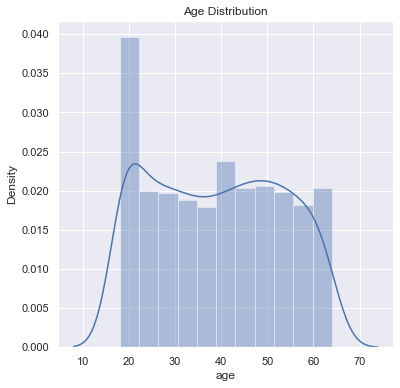

In [9]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

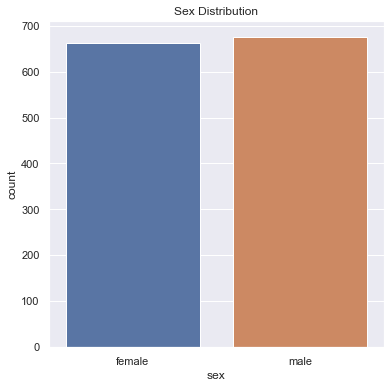

In [11]:
# gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


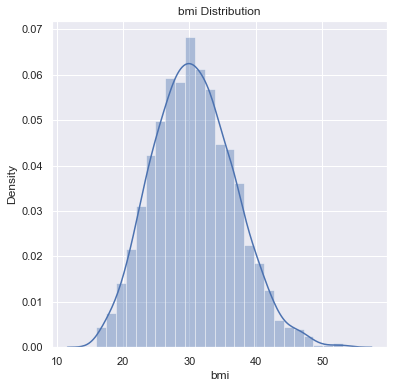

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("bmi Distribution")
plt.show()

Normal BMI range -->>> 18.5 to 24.9

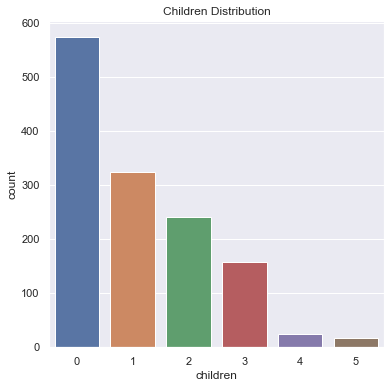

In [16]:
# children distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [17]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

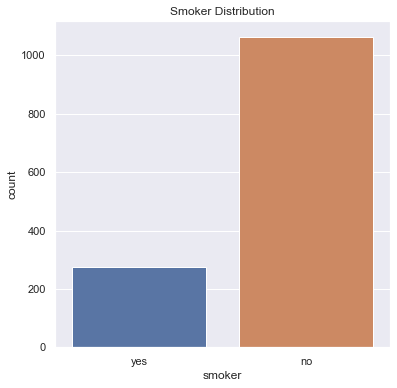

In [18]:
# smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

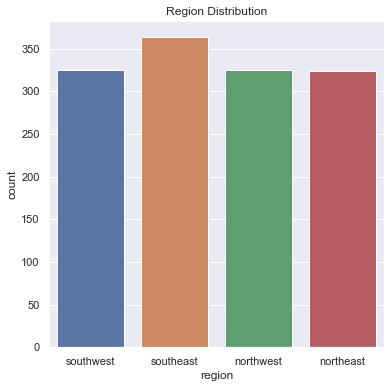

In [19]:
# smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


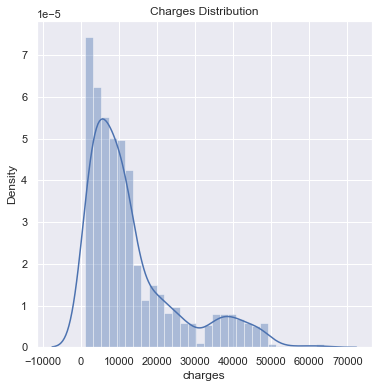

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges Distribution")
plt.show()

#### Preprocessing

##### Encoding Categorical features

In [23]:
# sex encoding
insurance_dataset.replace(
    {
    'sex':{
        'male':0,
        'female':1
    }},
    inplace = True
)

In [24]:
# smoker encoding
insurance_dataset.replace(
    {
    'smoker':{
        'yes':0,
        'no':1
    }},
    inplace = True
)

In [25]:
# region encoding
insurance_dataset.replace(
    {
    'region':{
        'southeast':0,'southwest':1,'northeast':2,'northwest':3
    }},
    inplace = True
)

In [26]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### Data Split

In [27]:
X = insurance_dataset.drop(columns='charges', axis = 1)
y = insurance_dataset['charges']

In [29]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Train-test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

In [33]:
y.shape, y_train.shape, y_test.shape

((1338,), (1070,), (268,))

### Model Training

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [38]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [39]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [40]:
# prediction on test data
test_data_prediction = model.predict(X_test)

In [41]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


### Building a Predictive System

In [43]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496
